In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [22]:
h5_path = Path("/home/dicarlod/Documents/Code/SteerAndInterp/data/easycom/Easycom_N-1173_fs-48k_nrfft-257_az_extended.h5")
n_mics = 1
f = h5py.File(h5_path,'r')
fs = int(f["fs"][()])
# el = np.array(f['el']) # (ndarray) [n_az]
# az = np.array(f['az']) # (ndarray) [n_az]
doas = np.array(f['doas']) # (ndarray) [n_az x n_el x 2]
airs = np.array(f['airs'])[:,:,:n_mics,:]       # (ndarray) [n_az x n_el x n_chan x n_smpl]
atfs = np.array(f['atfs'])[...,:n_mics]         # (ndarray) [n_az x n_el x n_rfft x n_chan]
rtfs = np.array(f['rtfs'])[...,:n_mics,:n_mics] # (ndarray) [n_az x n_el x n_rfft x n_chan x n_chan]
mic_pos = np.array(f['mic_pos'])[:,:n_mics]     # (ndarray) [3 x n_chan]
f.close()

In [23]:
n_az, n_el, n_chan, n_smpl = airs.shape
n_az, n_el, n_rfft, n_chan = atfs.shape


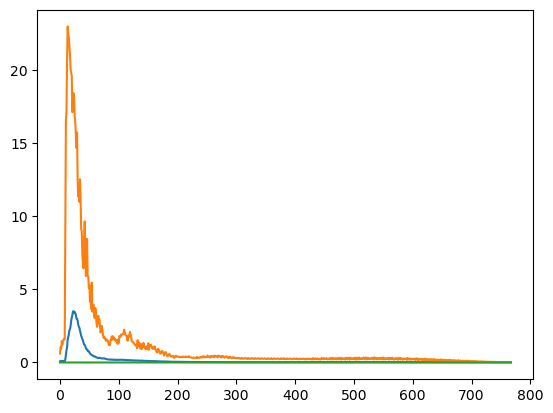

In [30]:
n_doas = n_az * n_el
airs = airs.reshape(n_doas, n_chan, n_smpl).squeeze()
mag = np.abs(airs)
plt.plot(np.mean(mag, axis=0))
plt.plot(np.max(mag, axis=0))
plt.plot(np.min(mag, axis=0))

142.24286503608764
4.789183505504724e-05


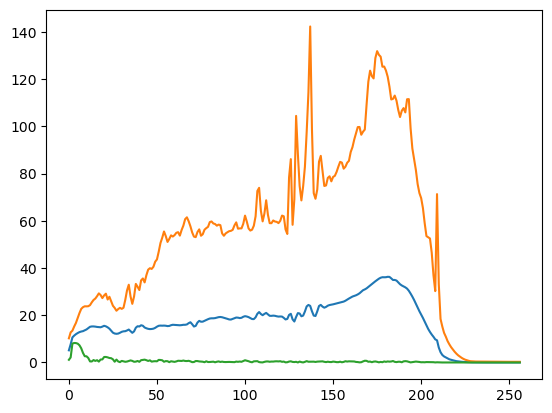

In [34]:
atfs = atfs.reshape(n_doas, n_rfft, n_chan).squeeze()
mag = np.abs(atfs)
plt.plot(np.mean(mag, axis=0))
plt.plot(np.max(mag, axis=0))
plt.plot(np.min(mag, axis=0))

print(np.max(mag))
print(np.min(mag))

43.06060982427084
-86.39477043851201


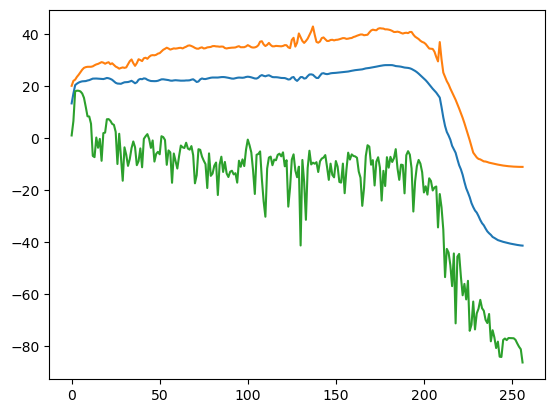

In [35]:
atfs = atfs.reshape(n_doas, n_rfft, n_chan).squeeze()
mag = 20*np.log10(np.abs(atfs))
plt.plot(np.mean(mag, axis=0))
plt.plot(np.max(mag, axis=0))
plt.plot(np.min(mag, axis=0))

print(np.max(mag))
print(np.min(mag))